<Task 1>

In [153]:
import pandas as pd

match_data = pd.read_csv('match_data')

In [154]:
match_data.describe()

,fixture_id,minute,second,1,2,X,Accurate Crosses - away,Accurate Crosses - home,Assists - away,Assists - home,...,Tackles - away,Tackles - home,Throwins - away,Throwins - home,Total Crosses - away,Total Crosses - home,Yellowcards - away,Yellowcards - home,Yellowred Cards - away,Yellowred Cards - home
count,6.394400e+04,63944.000000,63944.000000,63944.000000,63944.000000,63944.000000,60916.000000,60937.000000,36010.000000,36013.000000,...,61984.000000,61995.000000,62811.000000,62818.000000,61729.000000,61740.000000,63864.000000,63875.000000,40700.000000,40707.000000
mean,1.914800e+07,25.476526,27.695421,18.510137,29.482377,8.698023,2.010276,2.631209,0.812746,0.901397,...,8.411122,8.613533,8.751254,9.090722,7.766755,9.851749,0.911640,0.802630,0.011794,0.005503
std,1.345825e+04,14.496434,18.289720,64.166275,82.639170,12.092077,1.950212,2.292960,0.794087,0.826550,...,5.695672,5.720836,5.957945,6.351125,6.054359,7.351268,1.166182,1.069864,0.117546,0.073977
min,1.913445e+07,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.913530e+07,13.000000,10.000000,1.330000,1.950000,3.000000,0.000000,1.000000,0.000000,0.000000,...,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,0.000000,0.000000,0.000000,0.000000
50%,1.913974e+07,25.000000,27.000000,2.500000,4.000000,3.750000,2.000000,2.000000,1.000000,1.000000,...,8.000000,8.000000,8.000000,8.000000,7.000000,9.000000,1.000000,0.000000,0.000000,0.000000
75%,1.915513e+07,38.000000,44.000000,5.500000,13.000000,7.500000,3.000000,4.000000,1.000000,1.000000,...,12.000000,13.000000,13.000000,13.000000,11.000000,14.000000,1.000000,1.000000,0.000000,0.000000
max,1.917212e+07,80.000000,59.000000,501.000000,501.000000,51.000000,12.000000,14.000000,5.000000,6.000000,...,33.000000,33.000000,34.000000,45.000000,45.000000,46.000000,9.000000,7.000000,2.000000,1.000000


# Step 1: Cleaning 

In [155]:
filtered = match_data.loc[(match_data["suspended"] == False) & (match_data["stopped"] == False)]
filtered.info()
filtered[['1','X','2']].isna().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 56127 entries, 0 to 63941
Columns: 106 entries, fixture_id to result
dtypes: bool(3), float64(92), int64(2), object(9)
memory usage: 44.7+ MB


1    0
X    0
2    0
dtype: int64

Step 2: Grouping of Data 

# Step 2: 1. Half

In [156]:
# Filterting for first half 
first_half_data_raw = filtered.loc[filtered["halftime"] == "1st-half"]

In [157]:
first_half_data_raw.describe()

,fixture_id,minute,second,1,2,X,Accurate Crosses - away,Accurate Crosses - home,Assists - away,Assists - home,...,Tackles - away,Tackles - home,Throwins - away,Throwins - home,Total Crosses - away,Total Crosses - home,Yellowcards - away,Yellowcards - home,Yellowred Cards - away,Yellowred Cards - home
count,2.914800e+04,29148.000000,29148.000000,29148.000000,29148.000000,29148.000000,26248.000000,26269.000000,9871.000000,9873.000000,...,27279.000000,27290.000000,28066.000000,28073.000000,27021.000000,27032.000000,29070.000000,29081.000000,12665.000000,12671.000000
mean,1.914782e+07,24.472005,25.193701,4.083401,6.803229,4.860470,0.966245,1.253759,0.612400,0.692596,...,4.118883,4.310004,4.419761,4.550137,3.738389,4.690293,0.296113,0.259276,0.002211,0.001973
std,1.338062e+04,14.021972,17.869122,7.677947,12.386215,4.802945,1.178413,1.317302,0.624317,0.641301,...,3.001402,3.147057,3.295656,3.374758,3.236105,3.782570,0.588369,0.563842,0.046969,0.044376
min,1.913445e+07,0.000000,0.000000,1.000000,1.000000,1.830000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.913530e+07,12.000000,9.000000,1.570000,2.100000,3.100000,0.000000,0.000000,0.000000,0.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,1.913974e+07,24.000000,23.000000,2.300000,3.400000,3.500000,1.000000,1.000000,1.000000,1.000000,...,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,0.000000,0.000000,0.000000,0.000000
75%,1.915512e+07,36.000000,40.000000,3.600000,6.000000,4.500000,1.000000,2.000000,1.000000,1.000000,...,6.000000,6.000000,7.000000,7.000000,6.000000,7.000000,0.000000,0.000000,0.000000,0.000000
max,1.917212e+07,80.000000,59.000000,151.000000,201.000000,51.000000,7.000000,11.000000,3.000000,3.000000,...,19.000000,18.000000,21.000000,24.000000,20.000000,25.000000,4.000000,5.000000,1.000000,1.000000


In [158]:
second_half_data_raw = filtered.loc[filtered["halftime"] == "2nd-half"]

In [159]:
second_half_data_raw.describe()

,fixture_id,minute,second,1,2,X,Accurate Crosses - away,Accurate Crosses - home,Assists - away,Assists - home,...,Tackles - away,Tackles - home,Throwins - away,Throwins - home,Total Crosses - away,Total Crosses - home,Yellowcards - away,Yellowcards - home,Yellowred Cards - away,Yellowred Cards - home
count,2.697900e+04,26979.000000,26979.000000,26979.000000,26979.000000,26979.000000,26979.000000,26979.000000,20017.000000,20017.000000,...,26979.000000,26979.000000,26979.000000,26979.000000,26979.000000,26979.000000,26979.000000,26979.000000,22178.000000,22179.000000
mean,1.914783e+07,24.141443,30.432855,21.352562,35.031131,8.361629,2.863449,3.725972,0.847430,0.912275,...,11.789429,12.065755,12.482449,12.925423,11.098855,14.053523,1.428704,1.276252,0.016773,0.007935
std,1.349298e+04,14.046886,18.382152,62.400571,83.331581,10.543545,2.025954,2.258181,0.740381,0.753222,...,4.626645,4.587909,4.960898,5.495103,5.682415,6.560487,1.242005,1.149834,0.141456,0.088729
min,1.913445e+07,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.913529e+07,12.000000,13.000000,1.200000,1.610000,2.200000,1.000000,2.000000,0.000000,0.000000,...,9.000000,9.000000,9.000000,9.000000,7.000000,9.000000,1.000000,0.000000,0.000000,0.000000
50%,1.913973e+07,24.000000,32.000000,3.100000,6.000000,4.330000,3.000000,3.000000,1.000000,1.000000,...,11.000000,12.000000,12.000000,12.000000,10.000000,13.000000,1.000000,1.000000,0.000000,0.000000
75%,1.915512e+07,36.000000,48.000000,11.000000,26.000000,9.000000,4.000000,5.000000,1.000000,1.000000,...,15.000000,15.000000,16.000000,16.000000,14.000000,18.000000,2.000000,2.000000,0.000000,0.000000
max,1.917212e+07,72.000000,59.000000,501.000000,501.000000,51.000000,12.000000,13.000000,4.000000,3.000000,...,32.000000,32.000000,34.000000,45.000000,44.000000,44.000000,8.000000,6.000000,2.000000,1.000000


In [160]:
# Details about half (describe, info, plot)

In [161]:

def calc_probs(data: pd.DataFrame):
    data=data.copy()
    data['P_home']=1/data['1']
    data['P_draw']=1/data['X']
    data['P_away']=1/data['2']
    print(data[['P_home','P_draw','P_away']])
    return data

In [162]:
#1.1 


first_half_data = calc_probs(first_half_data_raw)
second_half_data = calc_probs(second_half_data_raw)



         P_home    P_draw    P_away
0      0.819672  0.153846  0.100000
1      0.833333  0.166667  0.076923
2      0.833333  0.166667  0.076923
3      0.833333  0.166667  0.076923
8      0.833333  0.166667  0.066667
...         ...       ...       ...
63889  0.546448  0.294118  0.230947
63890  0.546448  0.294118  0.230947
63891  0.546448  0.294118  0.222222
63892  0.546448  0.294118  0.222222
63893  0.546448  0.294118  0.222222

[29148 rows x 3 columns]
         P_home    P_draw    P_away
21     0.454545  0.322581  0.294118
22     0.454545  0.322581  0.294118
23     0.434783  0.333333  0.312500
24     0.421941  0.333333  0.312500
25     0.421941  0.333333  0.312500
...         ...       ...       ...
63937  0.925926  0.133333  0.007937
63938  0.952381  0.090909  0.003984
63939  0.952381  0.090909  0.004975
63940  0.961538  0.076923  0.002849
63941  0.980392  0.058824  0.001996

[26979 rows x 3 columns]


In [163]:
def normalize_probs(data: pd.DataFrame):
    data['P_home']=1/data['1']
    data['P_draw']=1/data['X']
    data['P_away']=1/data['2']

    print(data[['P_home','P_draw','P_away']])

    def normalize_row(row):
        row_probs = row[['P_home','P_draw','P_away']] 
        unnorm_probs = [prob for prob in row_probs]
        new = [prob / sum(unnorm_probs) for prob in unnorm_probs]
        return pd.Series(new, index=['P_home_norm','P_draw_norm','P_away_norm'])

    data[['P_home_norm','P_draw_norm','P_away_norm']] = data.apply(normalize_row, axis=1)
    return data

In [164]:
# Step 1.2 Normalizing
norm_first_half = normalize_probs(first_half_data)
norm_second_half = normalize_probs(second_half_data)

         P_home    P_draw    P_away
0      0.819672  0.153846  0.100000
1      0.833333  0.166667  0.076923
2      0.833333  0.166667  0.076923
3      0.833333  0.166667  0.076923
8      0.833333  0.166667  0.066667
...         ...       ...       ...
63889  0.546448  0.294118  0.230947
63890  0.546448  0.294118  0.230947
63891  0.546448  0.294118  0.222222
63892  0.546448  0.294118  0.222222
63893  0.546448  0.294118  0.222222

[29148 rows x 3 columns]
         P_home    P_draw    P_away
21     0.454545  0.322581  0.294118
22     0.454545  0.322581  0.294118
23     0.434783  0.333333  0.312500
24     0.421941  0.333333  0.312500
25     0.421941  0.333333  0.312500
...         ...       ...       ...
63937  0.925926  0.133333  0.007937
63938  0.952381  0.090909  0.003984
63939  0.952381  0.090909  0.004975
63940  0.961538  0.076923  0.002849
63941  0.980392  0.058824  0.001996

[26979 rows x 3 columns]


In [165]:
#1.3
import matplotlib.pyplot as plt
import numpy as np

def visualize(filtered: pd.DataFrame, halftime: str):
    # Calculate P(home win) - P(away win)
    filtered['P_diff'] = filtered['P_home'] - filtered['P_away']

    # Scatter plot for bookmaker's probabilities
    plt.scatter(filtered['P_diff'], filtered['P_draw'], alpha=0.5)
    plt.xlabel("P(Home Win) - P(Away Win)")
    plt.ylabel("P(Tie)")
    plt.title(f"{halftime}Bookmaker Probabilities")
    plt.show()

    # Define bins and categorize data
    bins = np.arange(-1, 1.2, 0.2)  # Define bins with intervals of 0.2
    filtered['P_diff_bin'] = pd.cut(filtered['P_diff'], bins)

    # Calculate actual probabilities
    grouped = filtered.groupby('P_diff_bin')
    draw_probabilities = grouped['P_draw_norm'].mean()
    draw_counts = grouped['P_draw_norm'].count()  # Number of games in each bin

    # Calculate the estimated draw probability
    estimated_draw_probabilities = grouped.apply(
        lambda g: g[g['P_draw_norm'] > g['P_draw']].shape[0] / g.shape[0] if g.shape[0] > 0 else 0
    )

    # Bar plot for estimated probabilities
    bin_centers = bins[:-1] + 0.1  # Calculate bin centers for plotting

    plt.figure(figsize=(10, 6))
    plt.bar(bin_centers, draw_probabilities, width=0.15, alpha=0.6, label="Bookmaker P(Tie)", align='center')
    plt.bar(bin_centers, estimated_draw_probabilities, width=0.15, alpha=0.6, label="Sample Estimated P(Tie)", align='edge')
    plt.xlabel("P(Home Win) - P(Away Win) Binned")
    plt.ylabel("Probability")
    plt.legend()
    plt.title(f"{halftime}Comparison of Bookmaker and Sample Estimated Probabilities")
    plt.show()


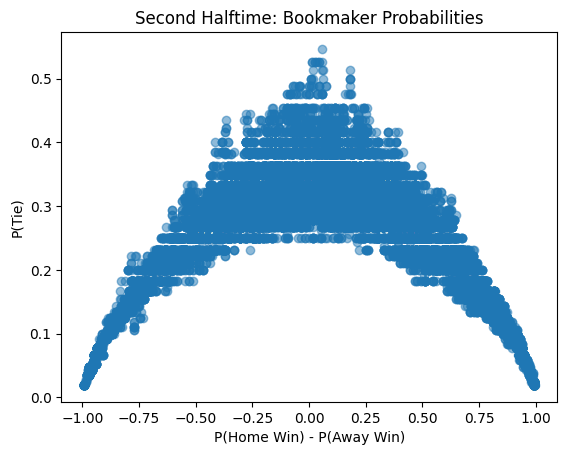

/var/folders/75/4vxmjkcj24jbs_rh6x7p_r780000gn/T/ipykernel_4983/3965942561.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = filtered.groupby('P_diff_bin')
/var/folders/75/4vxmjkcj24jbs_rh6x7p_r780000gn/T/ipykernel_4983/3965942561.py:26: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  estimated_draw_probabilities = grouped.apply(


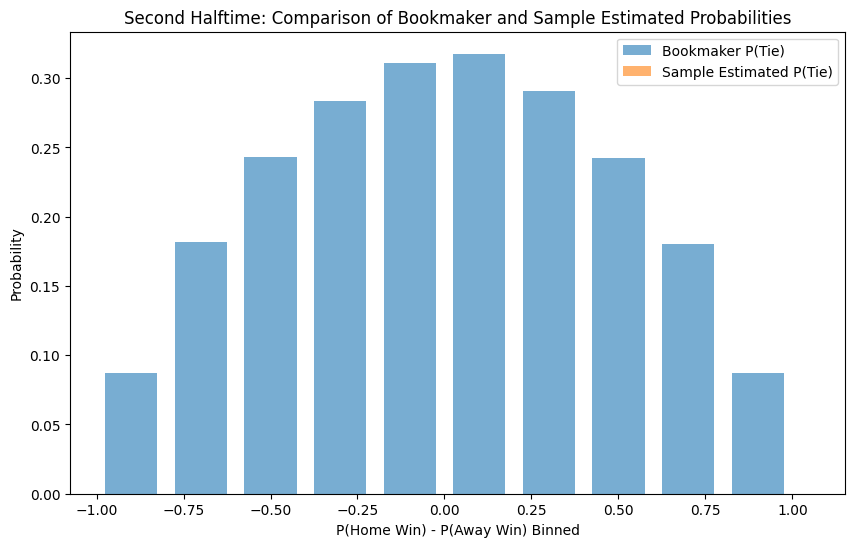

In [166]:
visualize(norm_first_half, "Second Halftime: ")

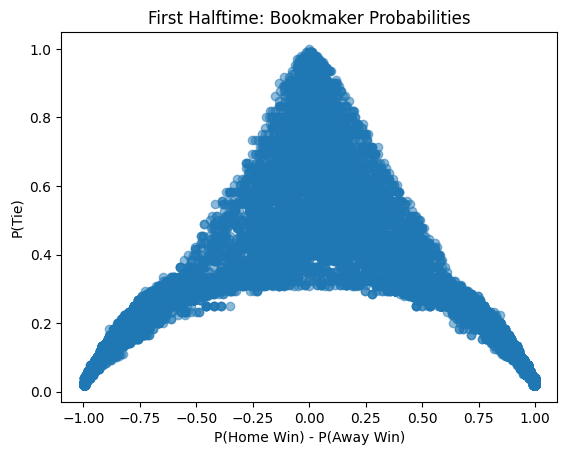

/var/folders/75/4vxmjkcj24jbs_rh6x7p_r780000gn/T/ipykernel_4983/3965942561.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = filtered.groupby('P_diff_bin')
/var/folders/75/4vxmjkcj24jbs_rh6x7p_r780000gn/T/ipykernel_4983/3965942561.py:26: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  estimated_draw_probabilities = grouped.apply(


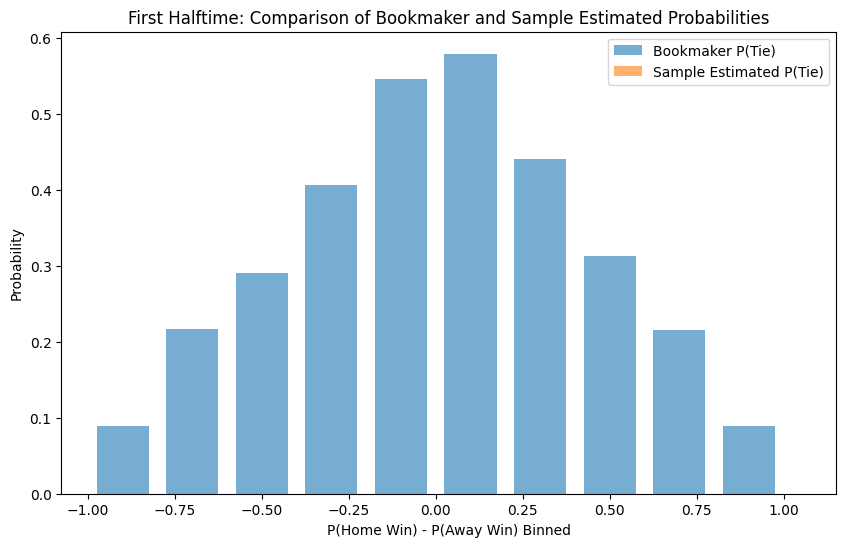

In [167]:
visualize(norm_second_half, "First Halftime: ")

In [168]:
def calc_for_bins(filtered: pd.DataFrame, halftime: str):
    # Calculate P(home win) - P(away win)
    filtered['P_diff'] = filtered['P_home'] - filtered['P_away']

    # Define bins and categorize data
    bins = np.arange(-1, 1.2, 0.2)  # Define bins with intervals of 0.2
    filtered['P_diff_bin'] = pd.cut(filtered['P_diff'], bins)

    # Group data by P_diff_bin
    grouped = filtered.groupby('P_diff_bin')

    # Count draws and total matches in each bin
    actual_draws = grouped.apply(lambda g: g[g['result'] == 'X'].shape[0])
    total_matches = grouped.size()  # Total matches in each bin

    # Calculate the actual probability of draws in each bin
    actual_draw_probabilities = actual_draws / total_matches

    # Bar plot for actual vs bookmaker probabilities
    bin_centers = bins[:-1] + 0.1  # Calculate bin centers for plotting

    plt.figure(figsize=(12, 6))
    plt.bar(bin_centers, actual_draw_probabilities, width=0.15, alpha=0.6, label="Actual P(Tie)", align='center')
    plt.bar(bin_centers, grouped['P_draw'].mean(), width=0.15, alpha=0.6, label="Bookmaker P(Tie)", align='edge')

    plt.xlabel("P(Home Win) - P(Away Win) (Binned)")
    plt.ylabel("Probability of draw")
    plt.legend()
    plt.title(f"{halftime} Comparison of Actual and Bookmaker Draw Probabilities")
    plt.show()

    # Identify bins where actual draw probability > bookmaker draw probability
    bins_with_advantage = actual_draw_probabilities[
        actual_draw_probabilities > grouped['P_draw'].mean()
    ]
    print('bins with advantage to bet on:',bins_with_advantage)


/var/folders/75/4vxmjkcj24jbs_rh6x7p_r780000gn/T/ipykernel_4983/1648933629.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = filtered.groupby('P_diff_bin')
/var/folders/75/4vxmjkcj24jbs_rh6x7p_r780000gn/T/ipykernel_4983/1648933629.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  actual_draws = grouped.apply(lambda g: g[g['result'] == 'X'].shape[0])


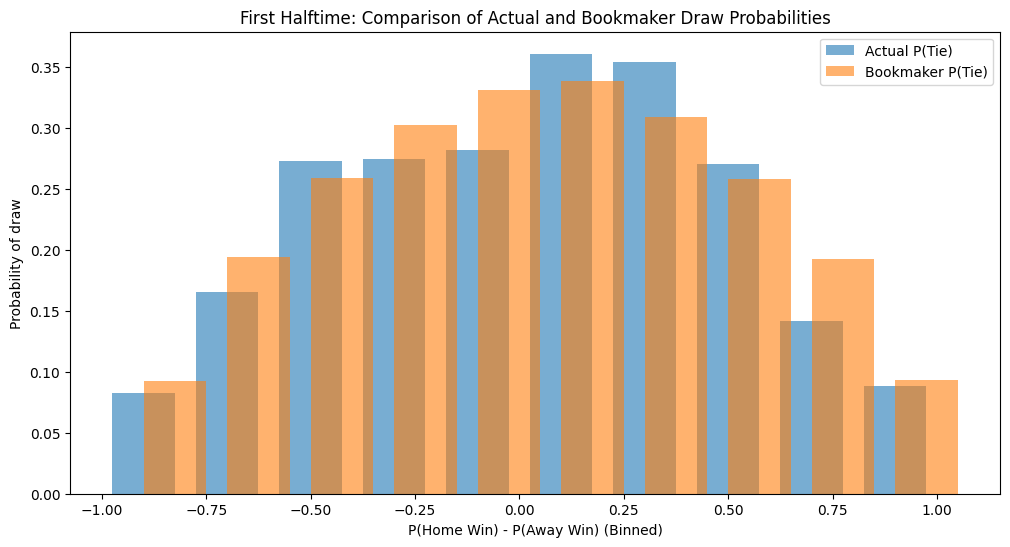

bins with advantage to bet on: P_diff_bin
(-0.6, -0.4]        0.272727
(-2.22e-16, 0.2]    0.360765
(0.2, 0.4]          0.353692
(0.4, 0.6]          0.270369
dtype: float64


/var/folders/75/4vxmjkcj24jbs_rh6x7p_r780000gn/T/ipykernel_4983/1648933629.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = filtered.groupby('P_diff_bin')
/var/folders/75/4vxmjkcj24jbs_rh6x7p_r780000gn/T/ipykernel_4983/1648933629.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  actual_draws = grouped.apply(lambda g: g[g['result'] == 'X'].shape[0])


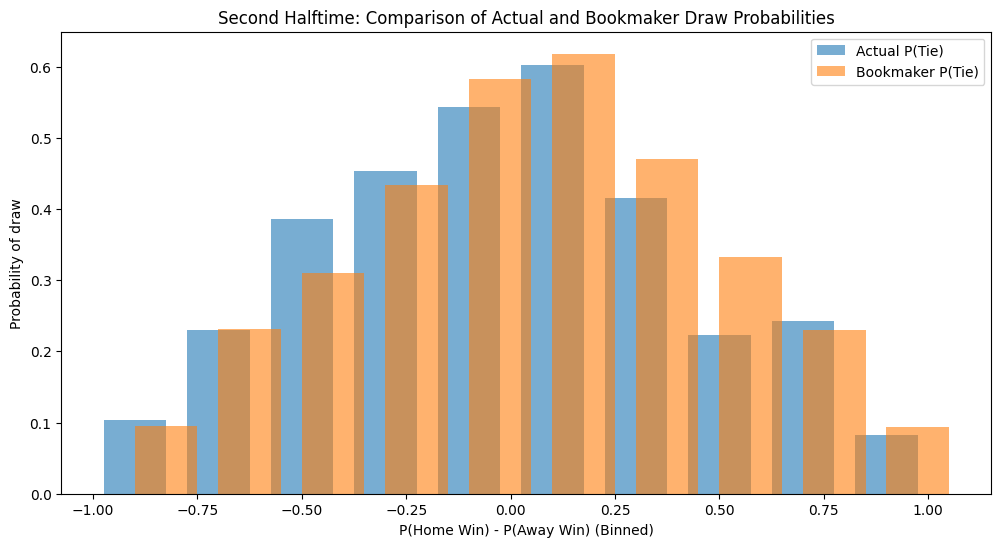

bins with advantage to bet on: P_diff_bin
(-1.0, -0.8]    0.103505
(-0.6, -0.4]    0.386364
(-0.4, -0.2]    0.453321
(0.6, 0.8]      0.243024
dtype: float64


In [169]:
calc_for_bins(first_half_data, "First Halftime:")
calc_for_bins(second_half_data, "Second Halftime:")

# Answer 1.4

# First half: 
The data indicates, that there is an advantage and possibility to win money on betting on a draw in four out of ten bins namingly:
bins with advantage to bet on: P_diff_bin
(-0.6, -0.4]        0.272727
(-2.22e-16, 0.2]    0.360765
(0.2, 0.4]          0.353692
(0.4, 0.6]          0.270369

 The difference between the actual and the bookmarker propability, which is the bias,is high with probabilities over 27% in four bins. In the other 6 cases there is a low bias. so the bookmakers are right in 60% of the cases makríng a good job and in 40% a not so good job.

 # Second half

The data indicates, that there is an advantage and possibility to win money on betting on a draw in four out of ten bins namingly:
bins with advantage to bet on: P_diff_bin
(-1.0, -0.8]    0.103505
(-0.6, -0.4]    0.386364
(-0.4, -0.2]    0.453321
(0.6, 0.8]      0.243024

There is a medium to high bias with porbabilities between 10 and 45% in four casas. And a low bias in 60% of the cases.
So the book makers is making a good job in 60% if the cases.





# Task 2

In [170]:
#Filtering data Second half for Goals after 90' minute

#filtered = match_data.loc[(match_data["suspended"] == False) & (match_data["stopped"] == False) & ]
#filtered.info()
#filtered[['1','X','2']].isna().sum()

In [171]:
# Identify matches with goals after 90th minute
late_goals = second_half_data_raw[
    (second_half_data_raw['minute'] > 45) & 
    ((second_half_data_raw['Score Change - home'].diff() != 0) | (second_half_data_raw['Score Change - away'].diff() != 0))
]

# Log the number of matches removed
removed_matches_goal = len(late_goals)

# Filter rows to exclude matches with late goals
sh_goal_removed = second_half_data_raw[~second_half_data_raw['fixture_id'].isin(late_goals['fixture_id'].tolist())]

# Print removed match count
print(f"Removed {removed_matches_goal} matches where a winning/drawing goal occurred after the 90th minute.")


Removed 103 matches where a winning/drawing goal occurred after the 90th minute.


In [172]:
#Identify matches with early read cards

early_red=first_half_data_raw[
        (first_half_data_raw['minute'] <= 15 ) & 
             ((first_half_data_raw['Redcards - home'].diff() != 0 ) | (first_half_data_raw['Redcards - away'].diff() != 0))   
            ]

# Log and remove these matches
removed_matches_red = len(early_red)
fh_red_removed = first_half_data_raw[~first_half_data_raw['fixture_id'].isin(early_red['fixture_id'].tolist())]

print(f"Removed {removed_matches_red} matches where a red card occurred in the first 15 minutes.")


Removed 156 matches where a red card occurred in the first 15 minutes.


/var/folders/75/4vxmjkcj24jbs_rh6x7p_r780000gn/T/ipykernel_4983/2884021881.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sh_goal_removed['P_home'] = 1 / sh_goal_removed['1']
/var/folders/75/4vxmjkcj24jbs_rh6x7p_r780000gn/T/ipykernel_4983/2884021881.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sh_goal_removed['P_draw'] = 1 / sh_goal_removed['X']
/var/folders/75/4vxmjkcj24jbs_rh6x7p_r780000gn/T/ipykernel_4983/2884021881.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

Index(['fixture_id', 'halftime', 'current_time', 'half_start_datetime',
       'match_start_datetime', 'minute', 'second', 'latest_bookmaker_update',
       'suspended', 'stopped',
       ...
       'Yellowred Cards - home', 'current_state', 'final_score', 'result',
       'P_home', 'P_draw', 'P_away', 'P_home_norm', 'P_draw_norm',
       'P_away_norm'],
      dtype='object', length=112)


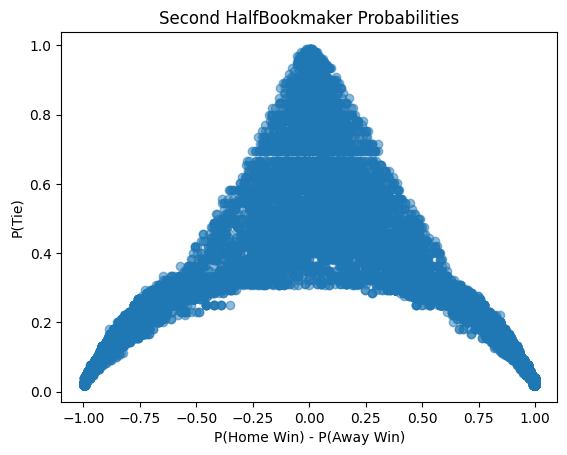

/var/folders/75/4vxmjkcj24jbs_rh6x7p_r780000gn/T/ipykernel_4983/3965942561.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['P_diff_bin'] = pd.cut(filtered['P_diff'], bins)
/var/folders/75/4vxmjkcj24jbs_rh6x7p_r780000gn/T/ipykernel_4983/3965942561.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = filtered.groupby('P_diff_bin')
/var/folders/75/4vxmjkcj24jbs_rh6x7p_r780000gn/T/ipykernel_4983/3965942561.py:26: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future versi

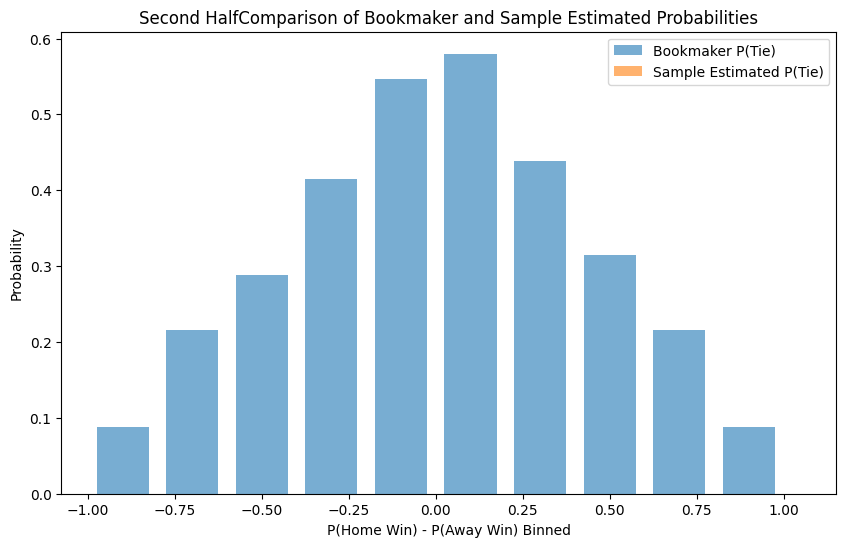

/var/folders/75/4vxmjkcj24jbs_rh6x7p_r780000gn/T/ipykernel_4983/3965942561.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['P_diff'] = filtered['P_home'] - filtered['P_away']


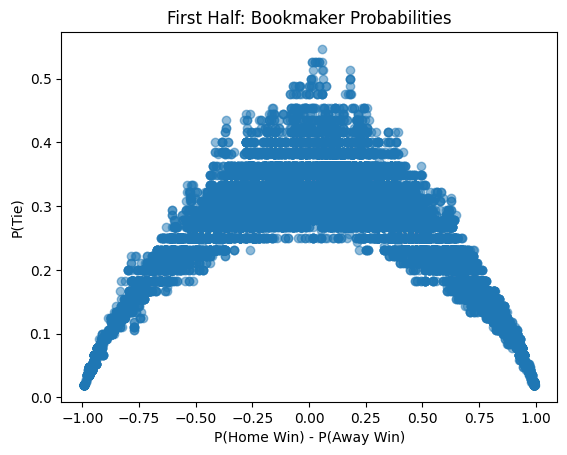

/var/folders/75/4vxmjkcj24jbs_rh6x7p_r780000gn/T/ipykernel_4983/3965942561.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['P_diff_bin'] = pd.cut(filtered['P_diff'], bins)
/var/folders/75/4vxmjkcj24jbs_rh6x7p_r780000gn/T/ipykernel_4983/3965942561.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = filtered.groupby('P_diff_bin')
/var/folders/75/4vxmjkcj24jbs_rh6x7p_r780000gn/T/ipykernel_4983/3965942561.py:26: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future versi

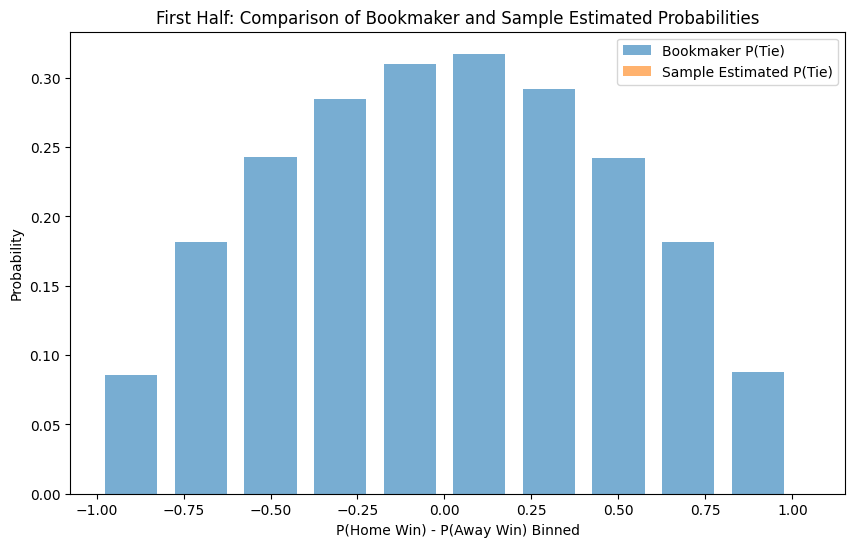

In [173]:
#
#new
# Ensure 'P_home', 'P_draw', and 'P_away' exist
sh_goal_removed['P_home'] = 1 / sh_goal_removed['1']
sh_goal_removed['P_draw'] = 1 / sh_goal_removed['X']
sh_goal_removed['P_away'] = 1 / sh_goal_removed['2']

# Recalculate probabilities in derived DataFrames if needed
for df in [sh_goal_removed, fh_red_removed]:
    df['P_home'] = 1 / df['1']
    df['P_draw'] = 1 / df['X']
    df['P_away'] = 1 / df['2']
    
sh_goal_removed[['1', 'X', '2']] = sh_goal_removed[['1', 'X', '2']].fillna(1)

#new
def normalize_row(row):
    row_probs = row[['P_home', 'P_draw', 'P_away']]
    total = row_probs.sum()
    return row_probs / total

sh_goal_removed[['P_home', 'P_draw', 'P_away']] = sh_goal_removed[['P_home', 'P_draw', 'P_away']].fillna(0)
normalized_probs = sh_goal_removed.apply(normalize_row, axis=1)
sh_goal_removed[['P_home_norm', 'P_draw_norm', 'P_away_norm']] = normalized_probs

#new
# Recalculate probabilities
fh_red_removed['P_home'] = 1 / fh_red_removed['1']
fh_red_removed['P_draw'] = 1 / fh_red_removed['X']
fh_red_removed['P_away'] = 1 / fh_red_removed['2']

# Normalize probabilities
def normalize_row(row):
    row_probs = row[['P_home', 'P_draw', 'P_away']]
    total = row_probs.sum()
    return row_probs / total

fh_red_removed[['P_home', 'P_draw', 'P_away']] = fh_red_removed[['P_home', 'P_draw', 'P_away']].fillna(0)
normalized_probs = fh_red_removed.apply(normalize_row, axis=1)
fh_red_removed[['P_home_norm', 'P_draw_norm', 'P_away_norm']] = normalized_probs

# Add P_diff and P_diff_bin
fh_red_removed['P_diff'] = fh_red_removed['P_home'] - fh_red_removed['P_away']
bins = np.arange(-1, 1.2, 0.2)
fh_red_removed['P_diff_bin'] = pd.cut(fh_red_removed['P_diff'], bins)

##


print(sh_goal_removed.columns)
visualize(sh_goal_removed, 'Second Half')
visualize(fh_red_removed, 'First Half: ')


/var/folders/75/4vxmjkcj24jbs_rh6x7p_r780000gn/T/ipykernel_4983/1648933629.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['P_diff'] = filtered['P_home'] - filtered['P_away']
/var/folders/75/4vxmjkcj24jbs_rh6x7p_r780000gn/T/ipykernel_4983/1648933629.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['P_diff_bin'] = pd.cut(filtered['P_diff'], bins)
/var/folders/75/4vxmjkcj24jbs_rh6x7p_r780000gn/T/ipykernel_4983/1648933629.py:10: FutureWarning: The default of observed=False is deprecate

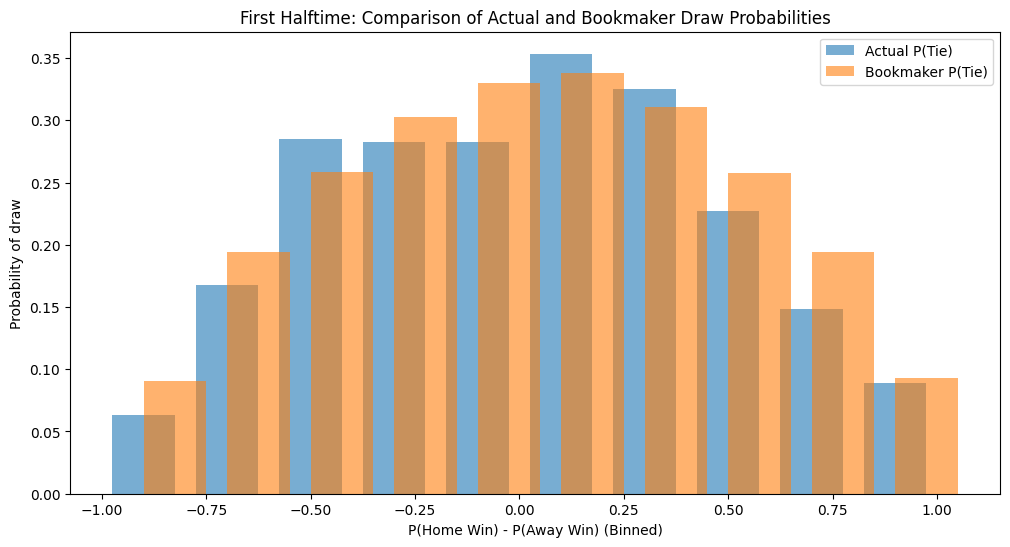

bins with advantage to bet on: P_diff_bin
(-0.6, -0.4]        0.284930
(-2.22e-16, 0.2]    0.353494
(0.2, 0.4]          0.325007
dtype: float64


/var/folders/75/4vxmjkcj24jbs_rh6x7p_r780000gn/T/ipykernel_4983/1648933629.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['P_diff'] = filtered['P_home'] - filtered['P_away']
/var/folders/75/4vxmjkcj24jbs_rh6x7p_r780000gn/T/ipykernel_4983/1648933629.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['P_diff_bin'] = pd.cut(filtered['P_diff'], bins)
/var/folders/75/4vxmjkcj24jbs_rh6x7p_r780000gn/T/ipykernel_4983/1648933629.py:10: FutureWarning: The default of observed=False is deprecate

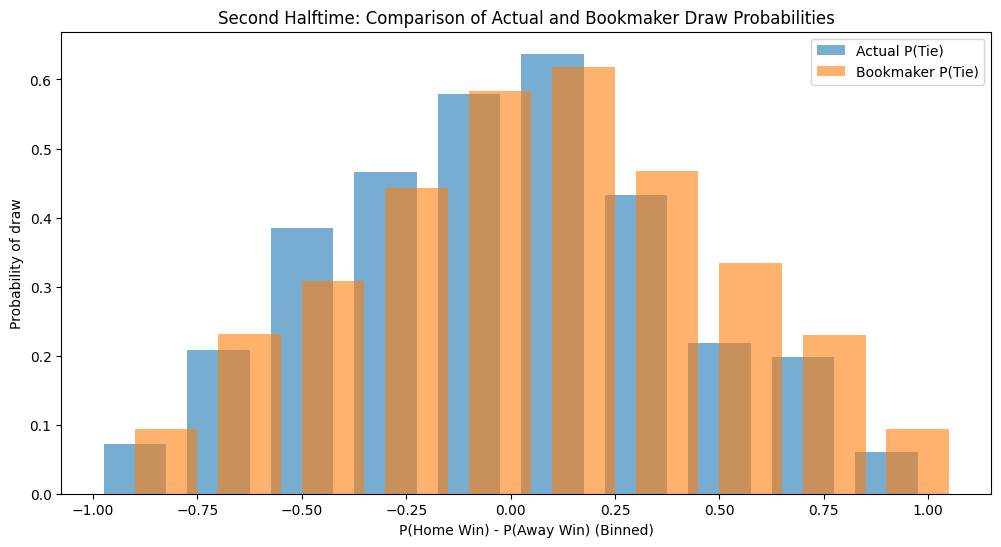

bins with advantage to bet on: P_diff_bin
(-0.6, -0.4]        0.385064
(-0.4, -0.2]        0.465753
(-2.22e-16, 0.2]    0.637287
dtype: float64


In [174]:
calc_for_bins(fh_red_removed, "First Halftime:")
calc_for_bins(sh_goal_removed, "Second Halftime:")

Is there any significant change in the observations you have for Task 1? Comment on the results:
# Task 2

#First half (Early red card):

In comparison to before, the output data now indicates , that there is an advantage and possibility to win money on betting on a draw in three out of ten bins. So one less then before.
 namingly:
bins with advantage to bet on: P_diff_bin
(-0.6, -0.4]        0.284930
(-2.22e-16, 0.2]    0.353494
(0.2, 0.4]          0.325007

The differences between the bookmarker propability and actual propability are very similar to the ones calculated in the first frun without the cleaning. Now the bookmaker makes a good job in70% of the cases. 

# Second half (late goal)

In comparison to before, the output data now indicates , that there is an advantage and possibility to win money on betting on a draw in three out of ten bins namingly:
bins with advantage to bet on: P_diff_bin
(-0.6, -0.4]        0.385064
(-0.4, -0.2]        0.465753
(-2.22e-16, 0.2]    0.637287

FOr the second half the differnces between bookmakers probability and actual probability is in all three cases over 38% one time even better than 60%. SO they got higher then in the run before the cleaingn. The bookmaker now makes a good job in 7 out of 10 cases but in the cases the bias got higher.




# Task 3 

In [175]:
filtered_probs = calc_probs(filtered)
all_data_normed = normalize_probs(filtered_probs)

         P_home    P_draw    P_away
0      0.819672  0.153846  0.100000
1      0.833333  0.166667  0.076923
2      0.833333  0.166667  0.076923
3      0.833333  0.166667  0.076923
8      0.833333  0.166667  0.066667
...         ...       ...       ...
63937  0.925926  0.133333  0.007937
63938  0.952381  0.090909  0.003984
63939  0.952381  0.090909  0.004975
63940  0.961538  0.076923  0.002849
63941  0.980392  0.058824  0.001996

[56127 rows x 3 columns]
         P_home    P_draw    P_away
0      0.819672  0.153846  0.100000
1      0.833333  0.166667  0.076923
2      0.833333  0.166667  0.076923
3      0.833333  0.166667  0.076923
8      0.833333  0.166667  0.066667
...         ...       ...       ...
63937  0.925926  0.133333  0.007937
63938  0.952381  0.090909  0.003984
63939  0.952381  0.090909  0.004975
63940  0.961538  0.076923  0.002849
63941  0.980392  0.058824  0.001996

[56127 rows x 3 columns]


In [176]:
from sklearn import tree

In [177]:
from sklearn.preprocessing import LabelEncoder

# Apply LabelEncoder
label_encoder = LabelEncoder()
filtered['result_enc'] = label_encoder.fit_transform(filtered['result'])
filtered['halftime_enc'] = label_encoder.fit_transform(filtered['halftime'])

/var/folders/75/4vxmjkcj24jbs_rh6x7p_r780000gn/T/ipykernel_4983/2785265368.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['result_enc'] = label_encoder.fit_transform(filtered['result'])
/var/folders/75/4vxmjkcj24jbs_rh6x7p_r780000gn/T/ipykernel_4983/2785265368.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['halftime_enc'] = label_encoder.fit_transform(filtered['halftime'])


In [178]:
filtered['result_enc'].unique()

array([0, 1, 2])

In [179]:
import matplotlib.pyplot as plt
from sklearn.tree import export_text


         P_home    P_draw    P_away
0      0.819672  0.153846  0.100000
1      0.833333  0.166667  0.076923
2      0.833333  0.166667  0.076923
3      0.833333  0.166667  0.076923
8      0.833333  0.166667  0.066667
...         ...       ...       ...
63937  0.925926  0.133333  0.007937
63938  0.952381  0.090909  0.003984
63939  0.952381  0.090909  0.004975
63940  0.961538  0.076923  0.002849
63941  0.980392  0.058824  0.001996

[56127 rows x 3 columns]
Non-Numerical Columns:
Index(['halftime', 'current_time', 'half_start_datetime',
       'match_start_datetime', 'latest_bookmaker_update', 'suspended',
       'stopped', 'name', 'ticking', 'current_state', 'final_score', 'result'],
      dtype='object')

DataFrame with Only Numerical Columns:
       fixture_id  minute  second     1      2     X  Accurate Crosses - away  \
0      19172016.0       9      59  1.22   10.0   6.5                      0.0   
1      19172016.0      25      53  1.20   13.0   6.0                      0.0   
2    

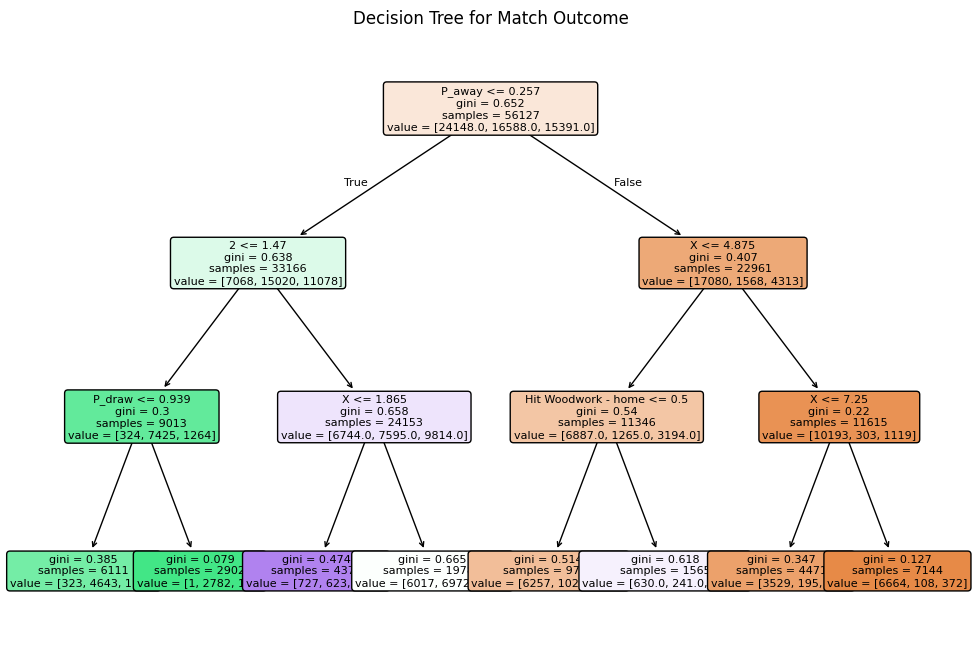


Decision Tree Rules:

|--- P_diff <= 0.26
|   |--- 2 <= 1.47
|   |   |--- P_away <= 0.94
|   |   |   |--- class: 1
|   |   |--- P_away >  0.94
|   |   |   |--- class: 1
|   |--- 2 >  1.47
|   |   |--- X <= 1.87
|   |   |   |--- class: 2
|   |   |--- X >  1.87
|   |   |   |--- class: 1
|--- P_diff >  0.26
|   |--- X <= 4.88
|   |   |--- Hit Woodwork - home <= 0.50
|   |   |   |--- class: 0
|   |   |--- Hit Woodwork - home >  0.50
|   |   |   |--- class: 2
|   |--- X >  4.88
|   |   |--- X <= 7.25
|   |   |   |--- class: 0
|   |   |--- X >  7.25
|   |   |   |--- class: 0



In [180]:
# Recompute probabilities if 'P_home' is missing
if 'P_home' not in filtered.columns:
    filtered = calc_probs(filtered)


filtered['P_diff'] = filtered['P_home'] - filtered['P_away']
filtered['minute_left'] = 90 - filtered['minute']
#'Goals - home', 'Goals - away', , 'minute'

# Features and target
#y = filtered[['1', '2', 'X']]
y = filtered['result_enc']

# TODO Kategorischen nominale werte result -> one-hot-encoden 
# TODO Katogorische ordinale werte -> label encoden
# TODO features auswählen (mit 2-3) anfangen

# Identify non-numerical columns
non_numerical_columns = filtered.select_dtypes(exclude=['number']).columns

# Print the non-numerical columns
print("Non-Numerical Columns:")
print(non_numerical_columns)

# Drop non-numerical columns
data_numerical = filtered.drop(columns=non_numerical_columns)

# Print the resulting DataFrame
print("\nDataFrame with Only Numerical Columns:")
print(data_numerical)

# Identify datetime columns
datetime_columns = data_numerical.select_dtypes(include=['datetime']).columns

# Print the datetime columns
print("Datetime Columns:")
print(datetime_columns)

# Drop datetime columns
data_without_datetime = data_numerical.drop(columns=datetime_columns)

# x_all = data_numerical.drop(columns='result')
# iks = filtered[["P_diff", "P_home"]]

# Fit decision tree
X = data_without_datetime.drop(columns=["result_enc"])

tree_model = tree.DecisionTreeClassifier(max_depth=3, random_state=42)
tree_model.fit(X, y)

# Visualize decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(tree_model, feature_names=data_without_datetime.columns, filled=True, rounded=True, fontsize=8)
plt.title("Decision Tree for Match Outcome")
plt.show()

# Extract and print the decision tree rules
rules = export_text(tree_model, feature_names=X.columns)
print("\nDecision Tree Rules:\n")
print(rules)

# Is there any interesting observation regarding the match result?

Role of P_diff and P_away:
The difference between probabilities (P_diff) and the probability of an away win (P_away) are critical decision-making factors. This suggests that closer matches (small P_diff) and games with balanced odds lead to more diverse outcomes.
Draws and Events Matter:
The tree prioritizes P_draw as a key determinant for matches likely ending in a draw, especially in the branch where P_away <= 0.681.
Match Events (Hit Woodwork - home):
Match events like hitting the woodwork are considered in cases where odds or probabilities are more uncertain. This inclusion highlights that in-game statistics or rare events may influence the outcome.


# Insights into odds efficiency

Predicted vs Implied Probabilities:
The tree predicts probabilities based on features like P_diff, P_draw, and P_away.
If these predicted probabilities differ significantly from the implied probabilities (from bookmaker odds), this could indicate market inefficiencies.

Possible Inefficiencies Observed:
Underestimation of Draws:
The tree suggests P_draw is a significant predictor. If bookmakers systematically underestimate draws (e.g., probabilities of low-scoring or evenly matched games), this could present an inefficiency.
Overweighting P_diff:
Games with a balanced P_diff (close to 0) are treated as highly uncertain, yet the tree splits further based on other features like P_away. This could suggest inefficiencies if bookmakers fail to adjust odds for these edge cases properly.
Reasonableness of Model Predictions

The decision tree captures intuitive rules, such as:
Draws being more likely in matches with balanced odds or probabilities (P_diff near 0).
High P_away values leading to fewer draws and more away wins.
Match-specific events (like hitting the woodwork) becoming relevant in specific contexts.